In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline

import scanpy as sc
import scvelo as scv
scv.logging.print_version()

scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.set_figure_params('scvelo')  # for beautified visualization

Running scvelo 0.1.24 (python 3.7.3) on 2020-01-04 02:57.


In [2]:
adata = scv.read('processed_adata.h5ad')
scv.utils.show_proportions(adata)
adata

Abundance of ['spliced', 'unspliced']: [0.77 0.23]


AnnData object with n_obs × n_vars = 223413 × 22555 
    obs: 'folder', 'n_genes'
    var: 'n_cells'
    layers: 'spliced', 'unspliced'

https://scvelo-notebooks.readthedocs.io/DentateGyrus.html

In [3]:
scv.pp.filter_and_normalize(adata, min_shared_counts=30, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 9364 genes that are detected in less than 30 counts (shared).
Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors
    finished (0:01:59) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing moments based on connectivities
    finished (0:00:28) --> added 
    'Ms' and 'Mu', moments of spliced/unspliced abundances (adata.layers)


In [4]:
adata

AnnData object with n_obs × n_vars = 223413 × 2000 
    obs: 'folder', 'n_genes', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'n_cells', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu'

In [5]:
scv.tl.velocity(adata)

computing velocities
    finished (0:01:07) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [6]:
scv.tl.velocity_graph(adata)
adata

computing velocity graph
    finished (0:17:44) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


AnnData object with n_obs × n_vars = 223413 × 2000 
    obs: 'folder', 'n_genes', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'n_cells', 'means', 'dispersions', 'dispersions_norm', 'velocity_gamma', 'velocity_r2', 'velocity_genes'
    uns: 'pca', 'neighbors', 'velocity_settings', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'

In [7]:
sc.tl.umap(adata)

In [8]:
adata.write_h5ad('adataWithVelocity.h5ad')

computing velocity embedding
    finished (0:00:59) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


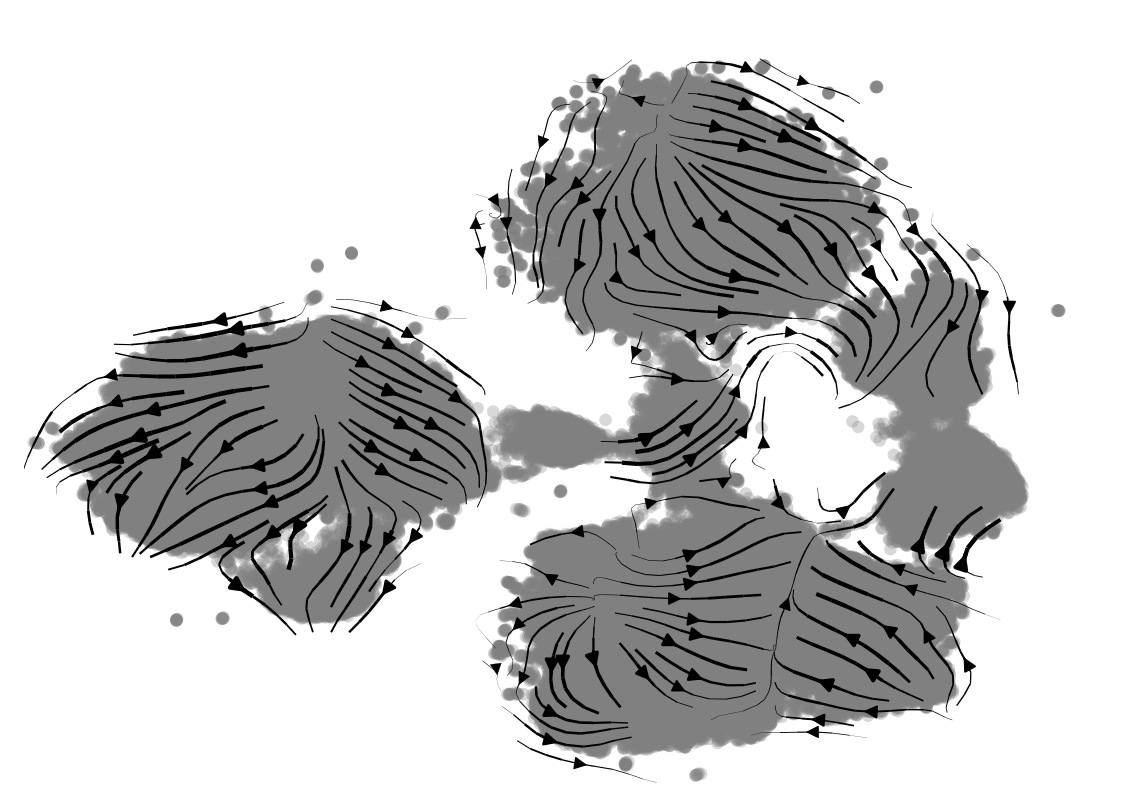

In [9]:
scv.pl.velocity_embedding_stream(adata, basis='umap')